# Radiosonde data to refractivity / IWV

IWV in $\frac{kg}{m^2}$ is defined as integral along the mean density of water vapor [kg/m^-3] for each layer.

$$IWV=\int_{h1}^{h2}\rho_v dh=\sum_{i=1}^{n}\rho_{d,i}r_i\Delta h_i$$

With $\rho_v$ the mean density of water vapor for each layer in $\frac{kg}{m^3}$, $dh$ the height difference between each layer, $\rho_d$ the dry air density in Pa, $r$ the mixing ratio of the water vapor mass to the mass of dry air (dimensionless) and $\Delta h_i$ the altitude steps in meter. 

Neglecting the altitude step $i$ for simplicity, the dry air density $\rho_d$ may be expressed as:
$$\rho_d=\frac{P}{R_dT}$$
Where $P$ is the observed air pressure in Pa, $R_d$ the specific gas constant for dry air: $R_d =287.058\frac{J}{kg K}$ and $T$ the measured temperature in $K$.

The mixing ratio $r$ may be expressed as:
$$r=0.622\frac{e}{P-e}$$
With $e$ the vapor pressure and P the air pressure. Together with the relative humidity (RH) measurements the vapor pressure is defined as:
$$e=\frac{RH\cdot e_{sat}}{100}$$
and $e_{sat}$, the saturation vapor pressure, as:
$$e_{sat}=6.112[Pa]\cdot exp(\frac{17.62T}{243.12+T})$$
With T in degree Celsius!

The relationship between IWV and Precipitable Water Vapor (PWV) in mm:
$$PWV=\frac{IWV}{\rho}$$
with $\rho$ defined as the density of liquid water.

The refractivity can be expressed as:

$$N=77.6\cdot \frac{P}{T} + 3.73\cdot 10^5 \frac{e}{T^2}$$

with $T$ in K.

## Example dataset deBilt (Netherlands) 23.06.2017

We will now compute the IWV and Refractivity for a dataset sample in June 2017 from a radiosonde measurement.

The data is extracted from the igra2 archive. This day was dominated by heavy rainfall.

In [1]:
import numpy as np

In [2]:
pres = np.array([1020, 1000, 997, 925, 850, 830, 751, 716, 700, 673, 633, 574, 538, 500, 468, 400, 399, 324, 300, 279, 274, 250, 229, 227, 223, 212, 203, 200, 167, 152, 150, 133, 100])
gph = np.array([2, 173, 201, 845, 1566, 1769, 2598, 2989, 3173, 3499, 3989, 4759, 5260, 5819, 6330, 7495, 7518, 9003, 9534, 10021, 10142, 10751, 11322, 11379, 11494, 11825, 12110, 12207, 13370, 13972, 14057, 14827, 16633])
temp = np.array([20.8500000000000, 22.2500000000000, 22.4500000000000, 18.4500000000000, 13.6500000000000, 11.8500000000000, 8.45000000000005, 5.05000000000001, 4.45000000000005, 2.45000000000005, -1.64999999999998, -6.64999999999998, -11.0500000000000, -13.6500000000000, -15.8500000000000, -23.2500000000000, -23.2500000000000, -35.4500000000000, -39.6500000000000, -44.0500000000000, -44.2500000000000, -48.2500000000000, -52.2500000000000, -52.2500000000000, -51.0500000000000, -48.0500000000000, -49.4500000000000, -50.2500000000000, -56.2500000000000, -53.0500000000000, -53.6500000000000, -56.8500000000000, -56.6500000000000])
rh = np.array([84, 73.3000000000000, 68.8000000000000, 74.6000000000000, 75.2000000000000, 82.4000000000000, 61.3000000000000, 90.6000000000000, 78.5000000000000, 69.5000000000000, 98.5000000000000, 76.7000000000000, 84.5000000000000, 84.8000000000000, 84.6000000000000, 78.5000000000000, 77.1000000000000, 72.5000000000000, 63.6000000000000, 60.2000000000000, 62.3000000000000, 61.8000000000000, 48.5000000000000, 37.8000000000000, 0.900000000000000, 4.70000000000000, 12.1000000000000, 11.9000000000000, 6.60000000000000, 1.10000000000000, 1.10000000000000, 0.900000000000000, 0.900000000000000])

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Temp - geopotential height

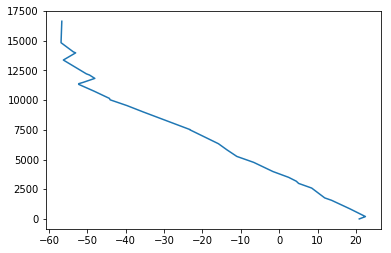

In [4]:
plt.plot(temp, gph)

Pres - geopotential height

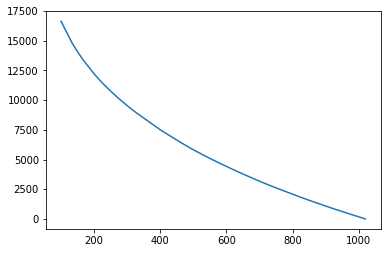

In [5]:
plt.plot(pres, gph)

RH - geopotential height

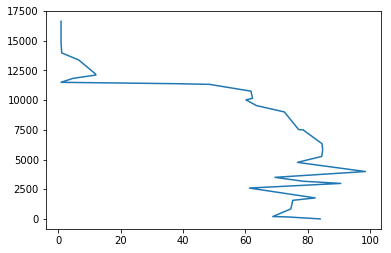

In [6]:
plt.plot(rh, gph)

Now we convert the data to IWV:

In [7]:
alt = gph

In [8]:
e_sat = 0.611*np.exp((17.2694*temp)/(temp+273.15-35.86))
e_sat = e_sat*10
vap_pres = rh*e_sat/100
Md = 0.0289644
R = 8.31432
p_dry = (Md/R)*((pres*100)/(temp+273.15))
mix_rat = 0.622*(vap_pres/(pres))

In [9]:
iwv = 0
iwv_store = np.array([])
for x in range(0,len(e_sat)-1):
    cur_iwv = (p_dry[x]*mix_rat[x]*(alt[x+1]-alt[x]))
    iwv = iwv + cur_iwv
    iwv_store = np.append(iwv_store, cur_iwv)

In [10]:
N = 77.6*(pres/(temp+273.15)) + 3.73*10**5*(vap_pres/(temp+273.15)**2)

In [11]:
ZTD = 0
for x in range(0,len(pres)-1):
    ZTD = ZTD+ ((N[x]*alt[x+1]) - (N[x]*alt[x]))
ZTD = 10**-6*ZTD

IWV along vertical track:

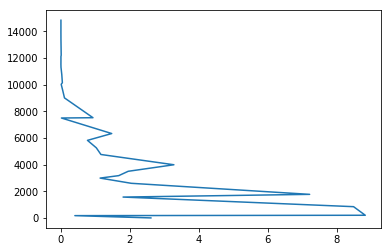

In [12]:
plt.plot(iwv_store, gph[0:-1])

IWV accumulated:

In [13]:
iwv

45.055848440752555

ZTD from refractivity N:

In [14]:
ZTD

2.4592196291858173